In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

## Perform API Calls

In [3]:
import openweathermapy.core as owm
from pprint import pprint
from urllib.error import HTTPError

# OpenWeatherMap API Key
api_key = api_keys.api_key

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

weather_data = []
city_idx = []

total_cities = len(cities)
sets = int(total_cities / 50) + int((total_cities % 50) > 0)
#print("{} {} {}".format(total_cities, sets, ((total_cities % 50) > 0)))
curr_cnt = 0

# Get current weather
for i, city in enumerate(cities):
    #print(f'{city}')
    try:
        current_weather = owm.get_current(city, **settings)
#        current_weather = city
    except HTTPError:
        print(f"No weather found for city {i} {city}")
    else:
#        pprint(f"Current weather object for Paris: {current_weather}.")
        print(f"Processing Record {curr_cnt % 50} of Set {int(curr_cnt / 50)} | {city}")
        curr_cnt += 1
        weather_data.append(current_weather)
        #pprint(weather_data)
    if (i >= 20):
        break

# summary = ['coord']
# data = [response(*summary) for response in weather_data]
summary = ['id', 'name', "clouds.all", 'sys.country', 'dt', "main.humidity",
           'coord.lat', 'coord.lon', "main.temp_max", 'wind.speed']
data = [response(*summary) for response in weather_data]
#print(len(weather_data))
#print(weather_data)
# print(len(data))
# print(data)

weather_data_df = pd.DataFrame(data, columns=['City ID', 'City Name', 'Cloudiness(%)',
                                              'Country', 'Date', 'Humidity(%)', 'Lat', 'Long',
                                              'MaxTemp(in F)', 'Wind Speed(mph)'])
weather_data_df
#weather_data_df.count()

Processing Record 0 of Set 0 | pisco
Processing Record 1 of Set 0 | lebu
Processing Record 2 of Set 0 | barrow
Processing Record 3 of Set 0 | dryden
Processing Record 4 of Set 0 | ushuaia
Processing Record 5 of Set 0 | hermanus
Processing Record 6 of Set 0 | carnarvon
Processing Record 7 of Set 0 | upernavik
Processing Record 8 of Set 0 | bambanglipuro
Processing Record 9 of Set 0 | vestmannaeyjar
Processing Record 10 of Set 0 | avarua
Processing Record 11 of Set 0 | smoky lake
Processing Record 12 of Set 0 | bluff
Processing Record 13 of Set 0 | new norfolk
Processing Record 14 of Set 0 | shiyan
Processing Record 15 of Set 0 | zyryanovsk
Processing Record 16 of Set 0 | port alfred
Processing Record 17 of Set 0 | vila do maio
No weather found for city 18 amderma
Processing Record 18 of Set 0 | severo-kurilsk
No weather found for city 20 barentsburg


,City ID,City Name,Cloudiness(%),Country,Date,Humidity(%),Lat,Long,MaxTemp(in F),Wind Speed(mph)
0,3932145,Pisco,75,PE,1533398400,72,-13.71,-76.20,66.20,3.36
1,344979,Lebu,75,ET,1533398400,82,8.96,38.73,62.60,6.93
2,3833859,Barrow,0,AR,1533400548,48,-38.31,-60.23,61.80,6.60
3,5942913,Dryden,1,CA,1533398400,64,49.79,-92.84,73.40,13.87
4,3833367,Ushuaia,40,AR,1533398400,80,-54.81,-68.31,37.40,23.04
5,3366880,Hermanus,92,ZA,1533400551,100,-34.42,19.24,49.47,1.34
6,1014034,Carnarvon,0,ZA,1533400549,76,-30.97,22.13,38.04,7.38
7,3418910,Upernavik,80,GL,1533400537,81,72.79,-56.15,43.62,9.62
8,1650434,Bambanglipuro,0,ID,1533400989,96,-7.95,110.28,62.07,2.80
9,3412093,Vestmannaeyjar,8,IS,1533400990,87,63.44,-20.27,55.50,7.38


In [4]:
from datetime import datetime

#datetime_object = datetime.fromordinal(1533313380)
print(
    datetime.fromtimestamp(
        int("1533313380")
    ).strftime('%Y-%m-%d')
)


2018-08-03


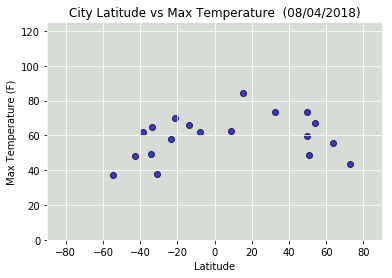

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
ax.scatter(weather_data_df['Lat'], weather_data_df['MaxTemp(in F)'], marker="o", facecolors="b",
            edgecolors="black", 
            alpha=0.75)
date_str = datetime.fromtimestamp(int(weather_data_df.iloc[0]['Date'])).strftime('(%m/%d/%Y)')
plt.title("City Latitude vs Max Temperature  " + date_str)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('w')
ax.set_xlim([-90, 90])
ax.set_ylim([0, 120])
plt.grid(color='w')
plt.show()

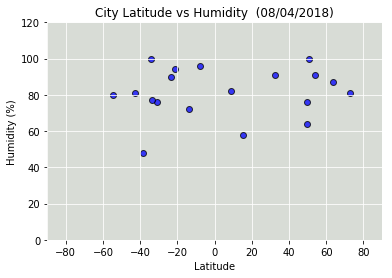

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
ax.scatter(weather_data_df['Lat'], weather_data_df['Humidity(%)'], marker="o", facecolors="b",
            edgecolors="black", 
            alpha=0.75)
date_str = datetime.fromtimestamp(int(weather_data_df.iloc[0]['Date'])).strftime('(%m/%d/%Y)')
plt.title("City Latitude vs Humidity  " + date_str)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('w')
ax.set_xlim([-90, 90])
ax.set_ylim([0, 120])
plt.grid(color='w')
plt.show()

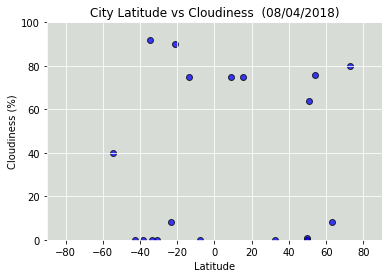

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
ax.scatter(weather_data_df['Lat'], weather_data_df['Cloudiness(%)'], marker="o", facecolors="b",
            edgecolors="black", 
            alpha=0.75)
date_str = datetime.fromtimestamp(int(weather_data_df.iloc[0]['Date'])).strftime('(%m/%d/%Y)')
plt.title("City Latitude vs Cloudiness  " + date_str)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('w')
ax.set_xlim([-90, 90])
ax.set_ylim([0, 100])
plt.grid(color='w')
plt.show()

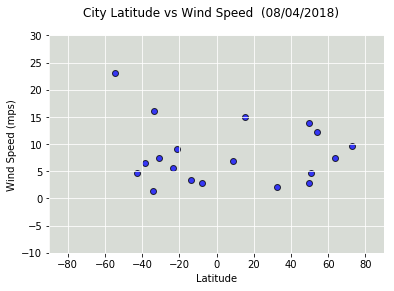

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
ax.scatter(weather_data_df['Lat'], weather_data_df['Wind Speed(mph)'], marker="o", facecolors="b",
            edgecolors="black", 
            alpha=0.75)
date_str = datetime.fromtimestamp(int(weather_data_df.iloc[0]['Date'])).strftime('(%m/%d/%Y)')
fig.suptitle("City Latitude vs Wind Speed  " + date_str)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
#plt.rcParams['figure.facecolor'] = 'grey'
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('w')
ax.set_xlim([-90, 90])
ax.set_ylim([-10, 30])
plt.grid(color='w')
plt.show()

### "What's the weather like as we approach the equator?"

(0, 5)

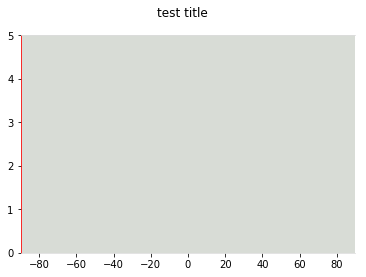

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
fig.suptitle('test title')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('red')
ax.set_xlim([-90, 90])
ax.set_ylim([0, 5])

#ax.set_facecolor((1.0, 0.47, 0.42))

In [46]:
weather_data_df

,City ID,City Name,Cloudiness(%),Country,Date,Humidity(%),Lat,Long,MaxTemp(in F),Wind Speed(mph)
0,3932145,Pisco,75,PE,1533398400,72,-13.71,-76.20,66.20,3.36
1,344979,Lebu,75,ET,1533398400,82,8.96,38.73,62.60,6.93
2,3833859,Barrow,0,AR,1533400548,48,-38.31,-60.23,61.80,6.60
3,5942913,Dryden,1,CA,1533398400,64,49.79,-92.84,73.40,13.87
4,3833367,Ushuaia,40,AR,1533398400,80,-54.81,-68.31,37.40,23.04
5,3366880,Hermanus,92,ZA,1533400551,100,-34.42,19.24,49.47,1.34
6,1014034,Carnarvon,0,ZA,1533400549,76,-30.97,22.13,38.04,7.38
7,3418910,Upernavik,80,GL,1533400537,81,72.79,-56.15,43.62,9.62
8,1650434,Bambanglipuro,0,ID,1533400989,96,-7.95,110.28,62.07,2.80
9,3412093,Vestmannaeyjar,8,IS,1533400990,87,63.44,-20.27,55.50,7.38
